In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "sicilia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,19,Sicilia,1,0,1,2,3,3,3,...,0.0,0.0,0.0,2.0,0.00,33.33,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,19,Sicilia,1,0,1,2,3,0,0,...,0.0,0.0,0.0,0.0,0.00,33.33,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,19,Sicilia,1,0,1,1,2,-1,1,...,0.0,0.0,0.0,-1.0,0.00,50.00,0.00,0.00,0.00,-33.33
3,2020-02-28T18:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,0.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,1.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2020-12-03T17:00:00,19,Sicilia,1465,221,1686,38094,39780,49,1294,...,34.0,10581.0,6329.0,77.0,13.11,4.24,12.23,20.45,0.45,0.12
283,2020-12-04T17:00:00,19,Sicilia,1431,216,1647,37703,39350,-430,1365,...,39.0,10026.0,5870.0,-391.0,13.11,4.19,13.61,23.25,-2.26,-1.08
284,2020-12-05T17:00:00,19,Sicilia,1400,215,1615,37925,39540,190,1240,...,34.0,10875.0,6398.0,222.0,13.31,4.08,11.40,19.38,-0.46,0.48
285,2020-12-06T17:00:00,19,Sicilia,1367,213,1580,38166,39746,206,1022,...,36.0,8132.0,5023.0,241.0,13.48,3.98,12.57,20.35,-0.93,0.52


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 7, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 918
Nuovi tamponi: 8386.0
Percentuale nuovi positivi/nuovi tamponi: 10.9 %
Nuovi guariti: 384.0
Nuovi deceduti: 34.0
Variazione positivi ricoverati con sintomi: 20.0
Variazione positivi in terapia intensiva: -8.0
Variazione positivi in isolamento dimiciliare: 488.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 7, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-08T17:00:00,19,Sicilia,376,33,409,3287,3696,147,259,...,3.0,7374.0,4806.0,143.0,8.07,11.07,3.51,5.39,10.00,4.14
1,2020-10-09T17:00:00,19,Sicilia,376,35,411,3490,3901,205,233,...,4.0,7151.0,4298.0,203.0,8.52,10.54,3.26,5.42,6.06,5.55
2,2020-10-10T17:00:00,19,Sicilia,387,35,422,3721,4143,242,285,...,2.0,7741.0,4681.0,231.0,8.29,10.19,3.68,6.09,0.00,6.20
3,2020-10-11T17:00:00,19,Sicilia,388,38,426,3975,4401,258,297,...,1.0,4509.0,2777.0,254.0,8.92,9.68,6.59,10.69,8.57,6.23
4,2020-10-12T17:00:00,19,Sicilia,404,42,446,4236,4682,281,298,...,3.0,3892.0,2374.0,261.0,9.42,9.53,7.66,12.55,10.53,6.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-03T17:00:00,19,Sicilia,1465,221,1686,38094,39780,49,1294,...,34.0,10581.0,6329.0,77.0,13.11,4.24,12.23,20.45,0.45,0.12
57,2020-12-04T17:00:00,19,Sicilia,1431,216,1647,37703,39350,-430,1365,...,39.0,10026.0,5870.0,-391.0,13.11,4.19,13.61,23.25,-2.26,-1.08
58,2020-12-05T17:00:00,19,Sicilia,1400,215,1615,37925,39540,190,1240,...,34.0,10875.0,6398.0,222.0,13.31,4.08,11.40,19.38,-0.46,0.48
59,2020-12-06T17:00:00,19,Sicilia,1367,213,1580,38166,39746,206,1022,...,36.0,8132.0,5023.0,241.0,13.48,3.98,12.57,20.35,-0.93,0.52


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

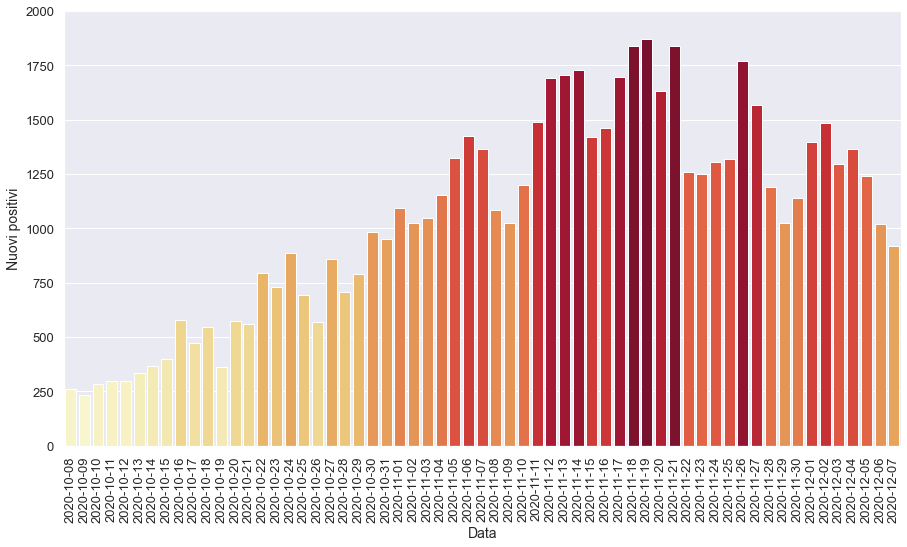

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

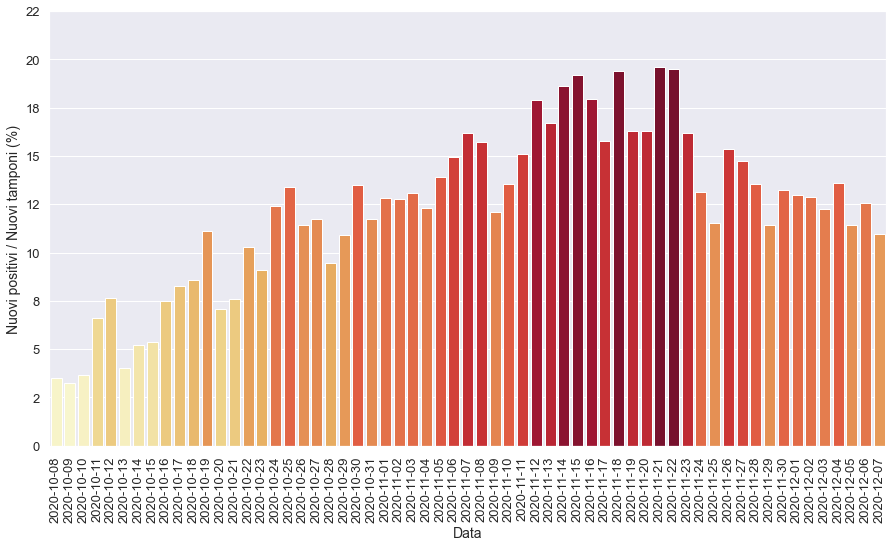

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

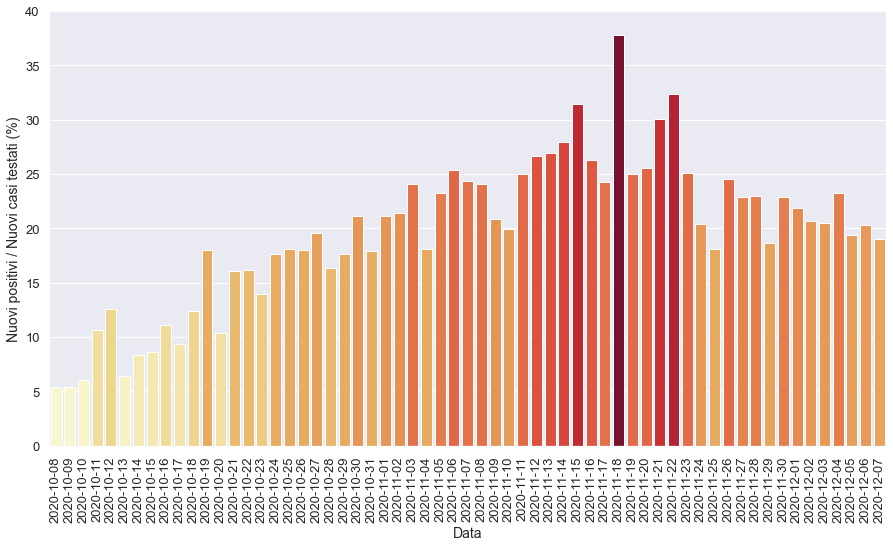

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

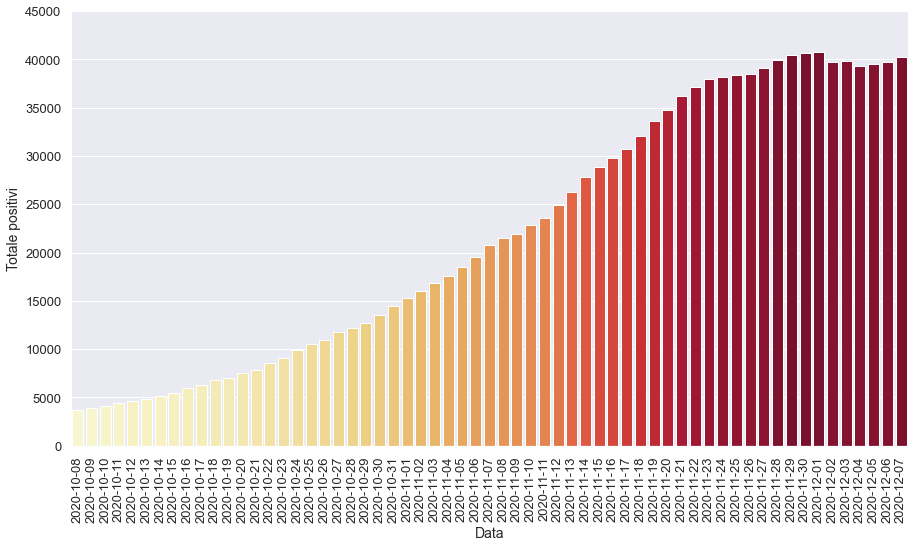

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

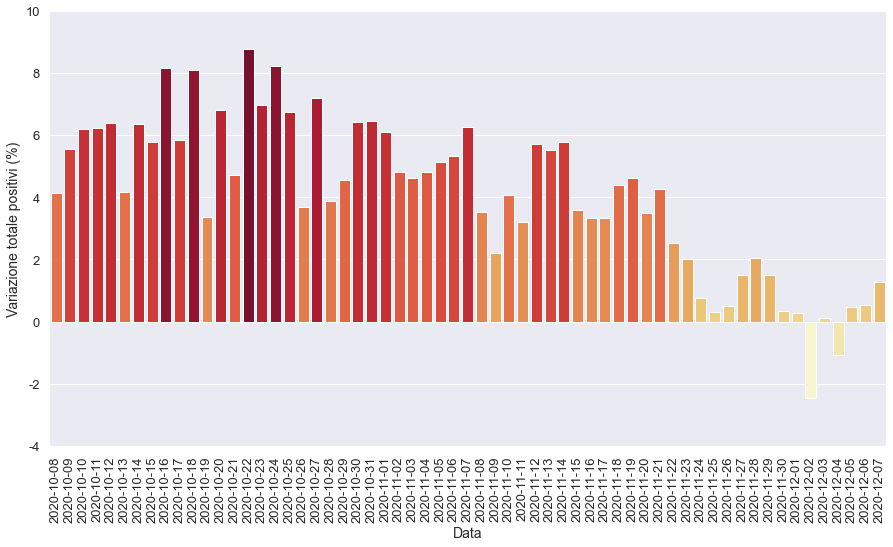

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

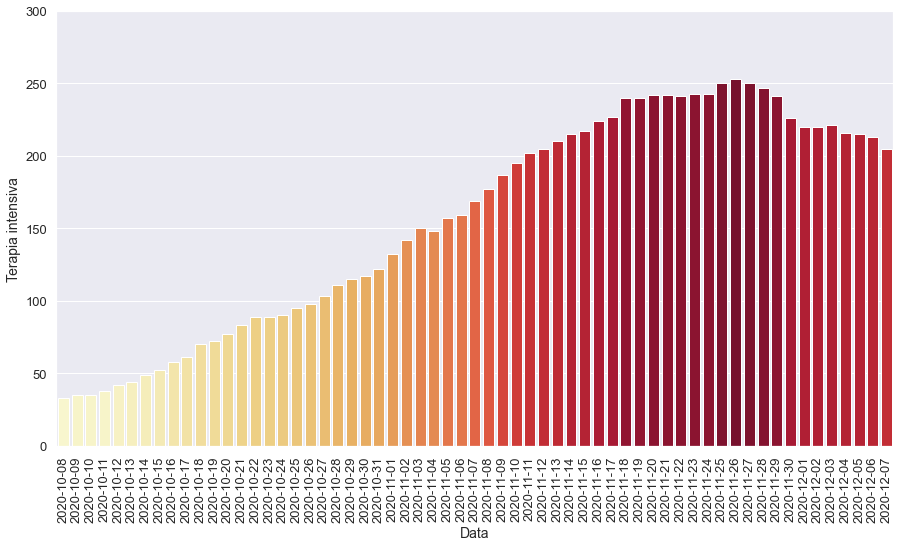

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

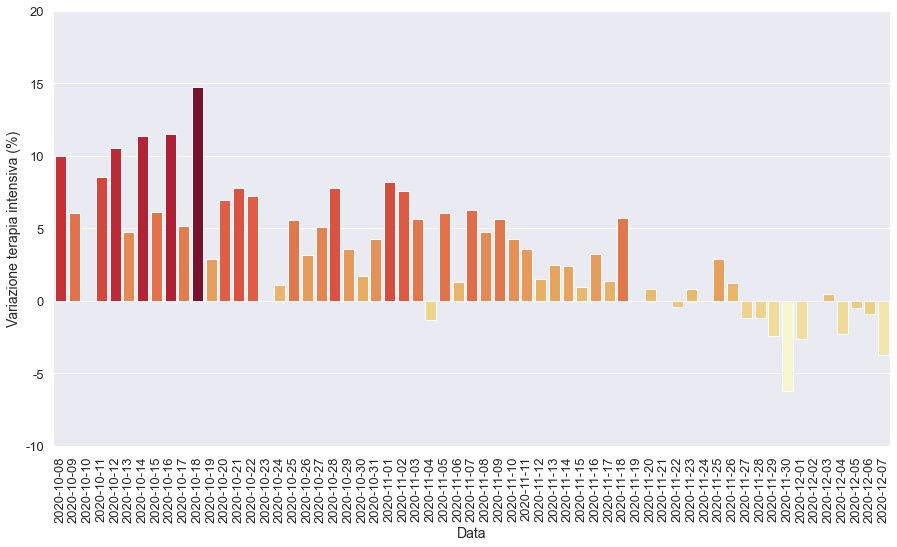

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

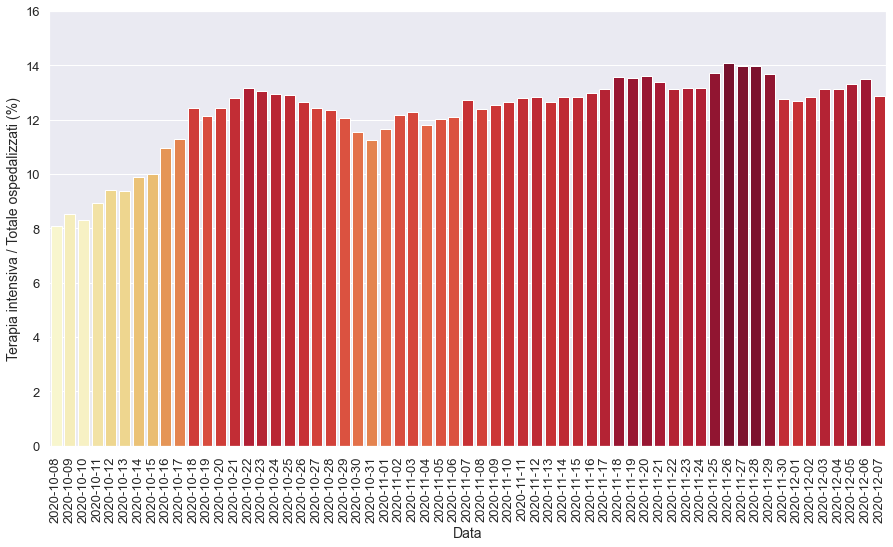

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

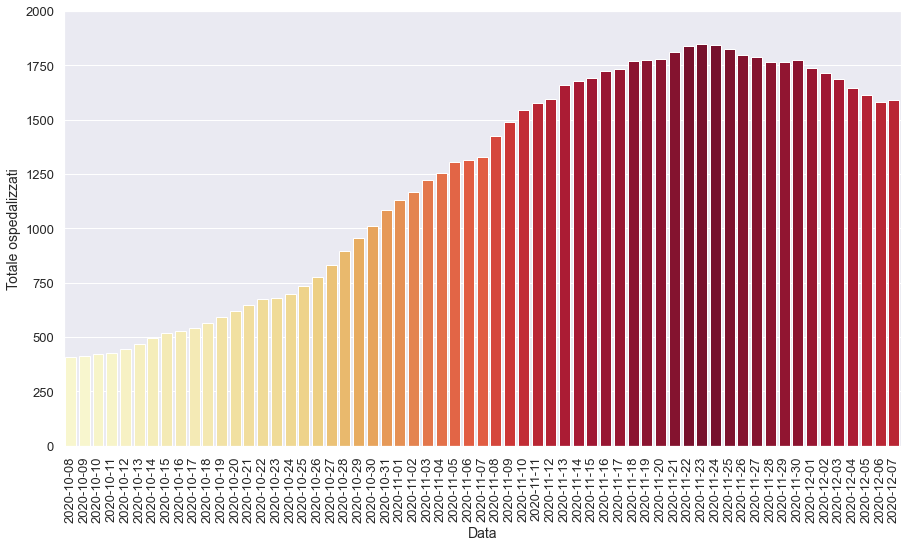

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

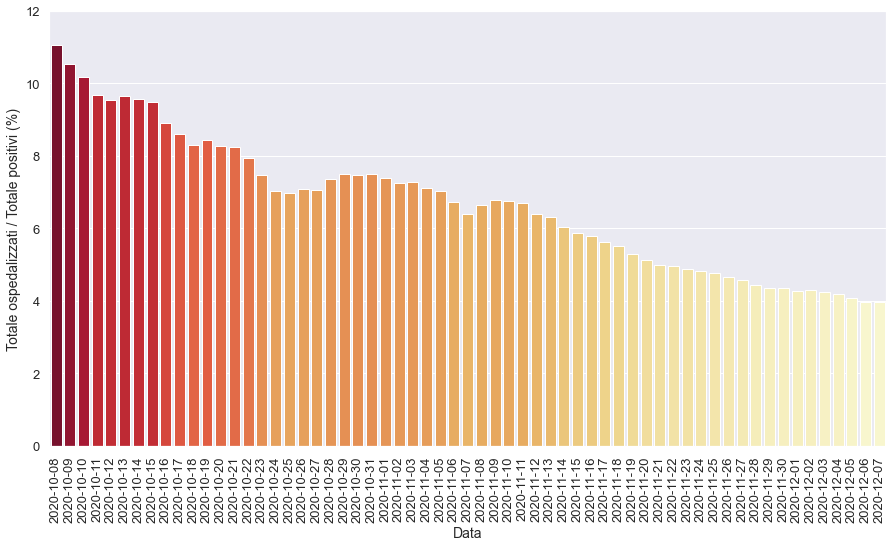

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

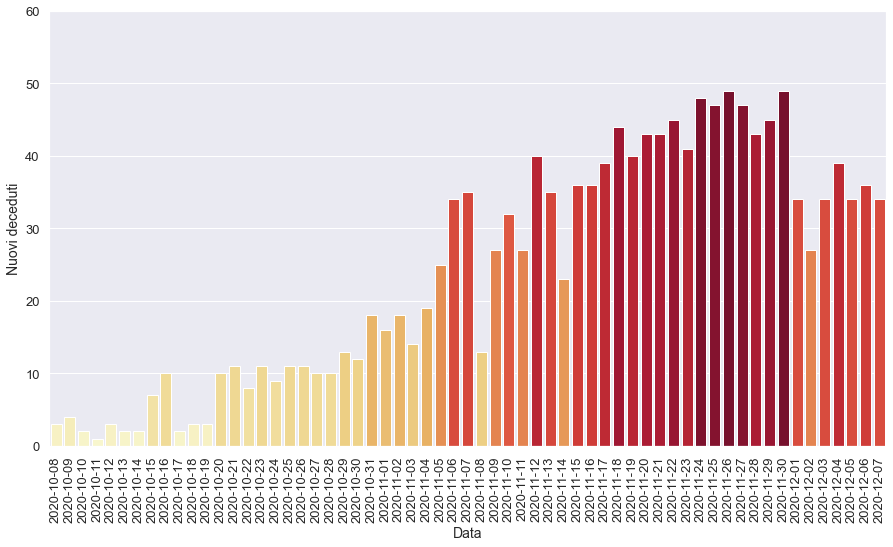

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

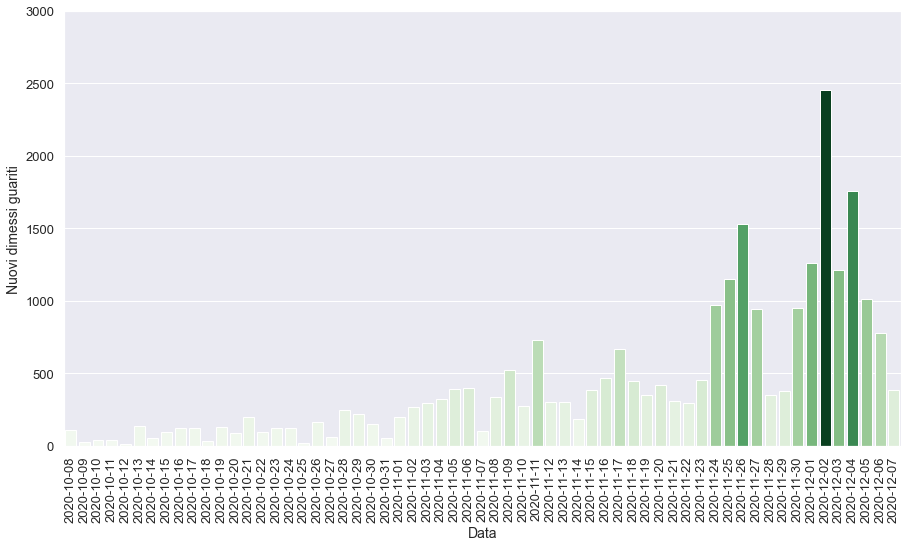

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-07T17:00:00,19,Sicilia,1161,169,1330,19407,20737,1224,1363,...,35.0,8431.0,5601.0,1210.0,12.71,6.41,16.17,24.33,6.29,6.27
1,2020-11-08T17:00:00,19,Sicilia,1250,177,1427,20040,21467,730,1083,...,13.0,6894.0,4505.0,633.0,12.40,6.65,15.71,24.04,4.73,3.52
2,2020-11-09T17:00:00,19,Sicilia,1303,187,1490,20449,21939,472,1023,...,27.0,8458.0,4895.0,409.0,12.55,6.79,12.10,20.90,5.65,2.20
3,2020-11-10T17:00:00,19,Sicilia,1348,195,1543,21289,22832,893,1201,...,32.0,8856.0,6013.0,840.0,12.64,6.76,13.56,19.97,4.28,4.07
4,2020-11-11T17:00:00,19,Sicilia,1376,202,1578,21986,23564,732,1487,...,27.0,9839.0,5956.0,697.0,12.80,6.70,15.11,24.97,3.59,3.21
5,2020-11-12T17:00:00,19,Sicilia,1391,205,1596,23318,24914,1350,1692,...,40.0,9455.0,6337.0,1332.0,12.84,6.41,17.90,26.70,1.49,5.73
6,2020-11-13T17:00:00,19,Sicilia,1450,210,1660,24626,26286,1372,1707,...,35.0,10217.0,6343.0,1308.0,12.65,6.32,16.71,26.91,2.44,5.51
7,2020-11-14T17:00:00,19,Sicilia,1462,215,1677,26129,27806,1520,1729,...,23.0,9274.0,6179.0,1503.0,12.82,6.03,18.64,27.98,2.38,5.78
8,2020-11-15T17:00:00,19,Sicilia,1476,217,1693,27114,28807,1001,1422,...,36.0,7416.0,4517.0,985.0,12.82,5.88,19.17,31.48,0.93,3.60
9,2020-11-16T17:00:00,19,Sicilia,1501,224,1725,28040,29765,958,1461,...,36.0,8151.0,5564.0,926.0,12.99,5.80,17.92,26.26,3.23,3.33


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

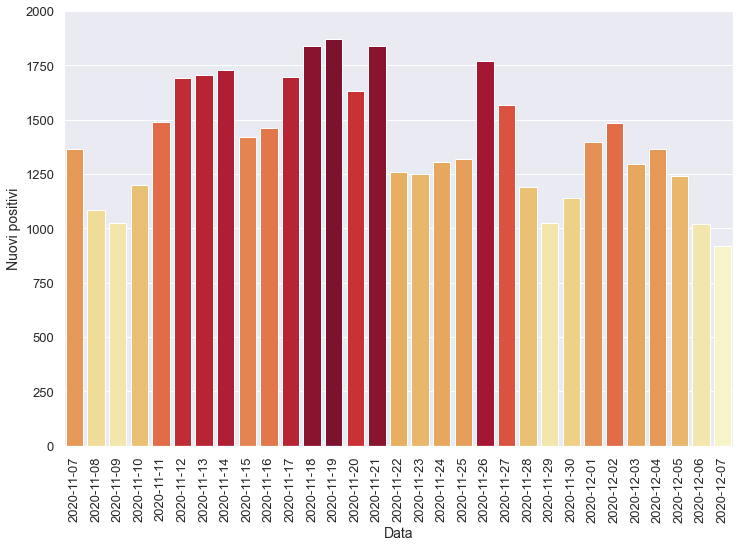

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

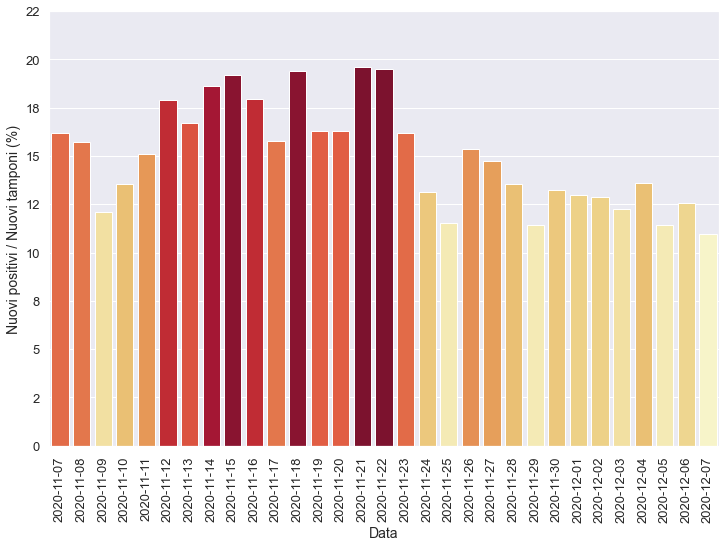

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

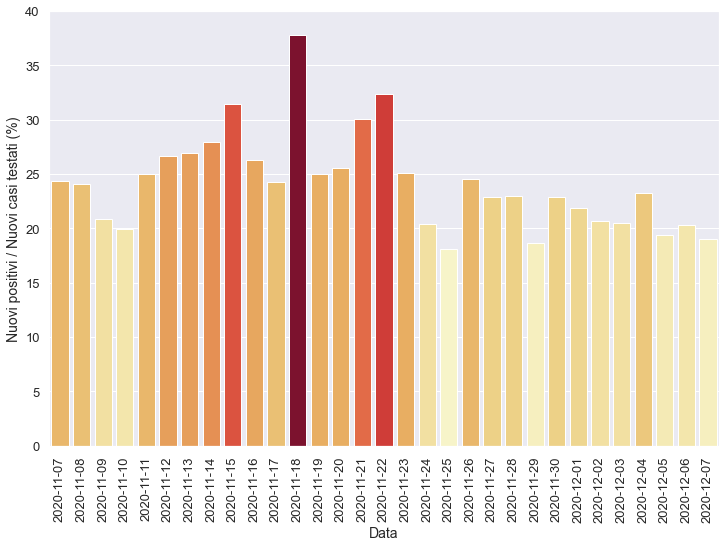

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

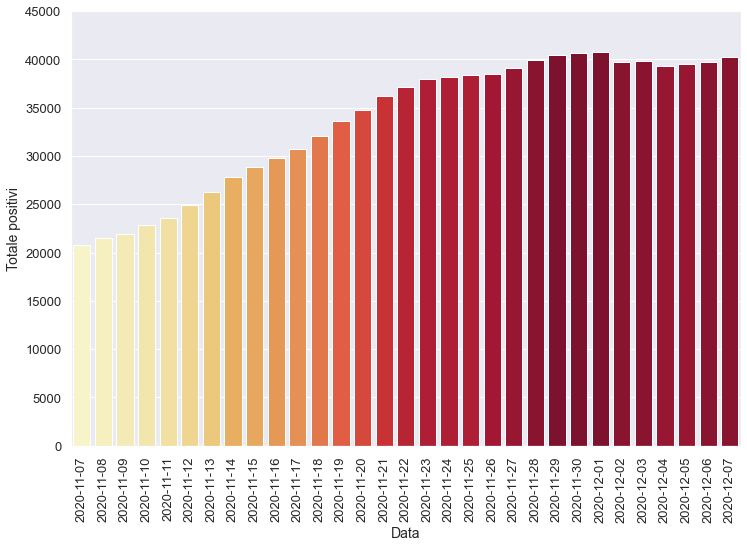

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

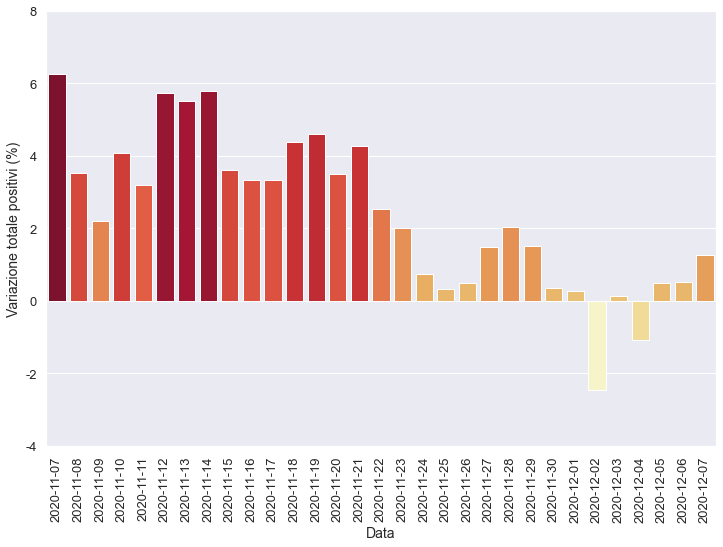

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

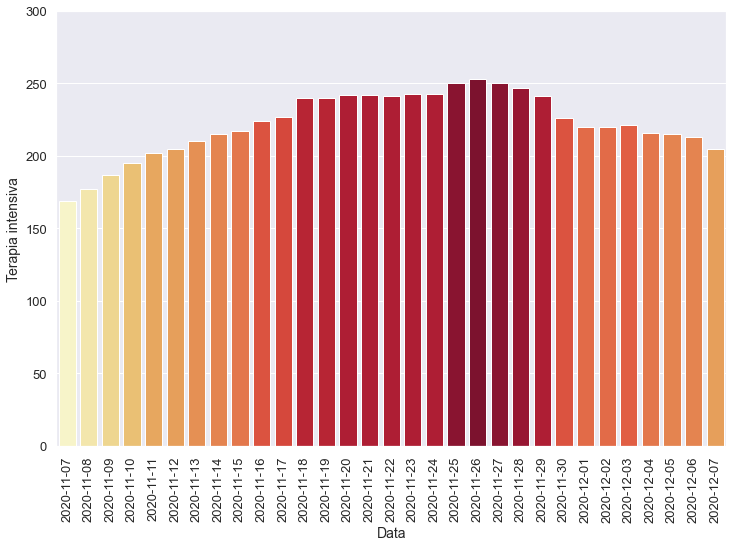

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

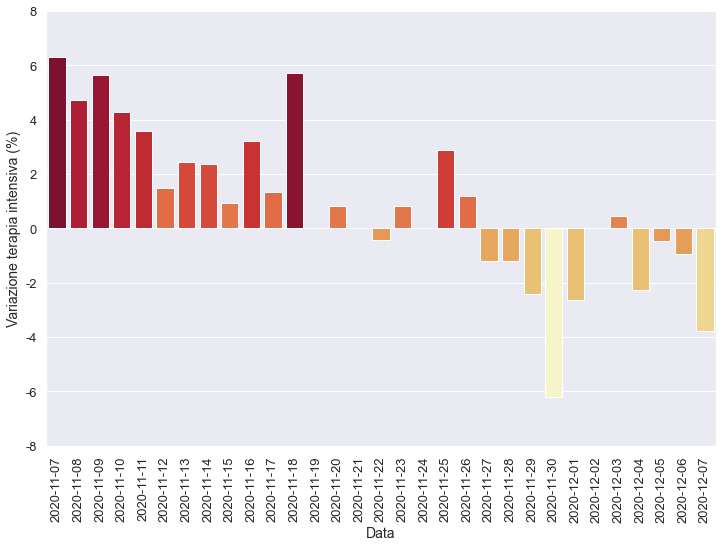

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

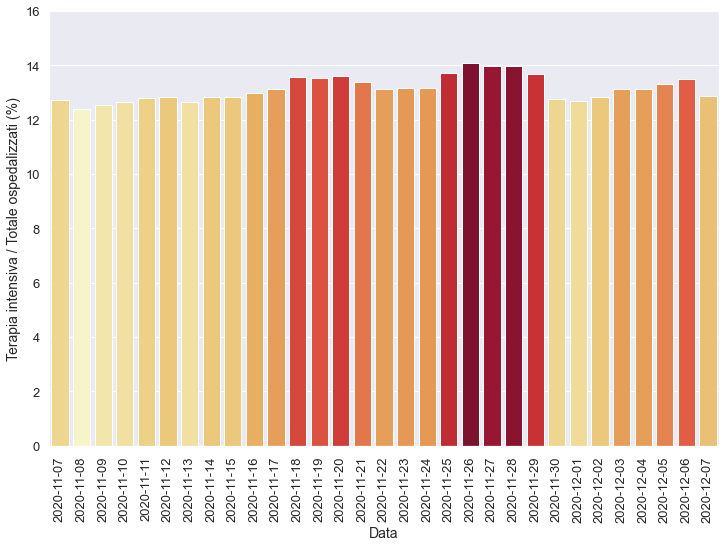

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

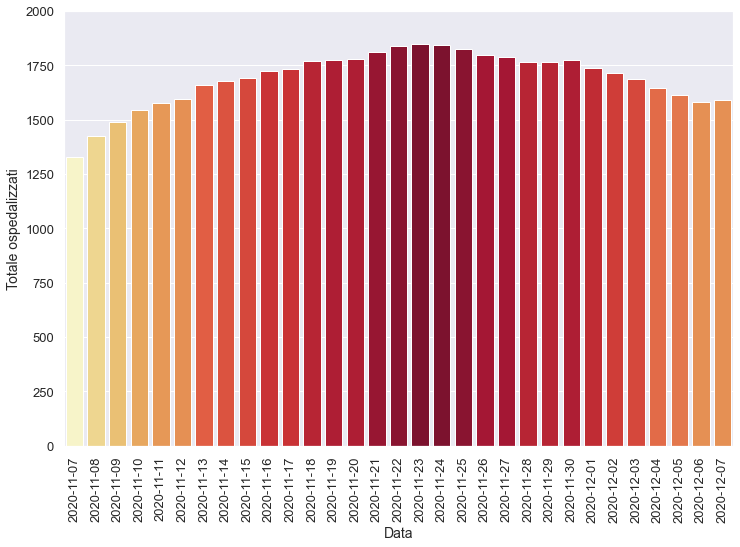

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

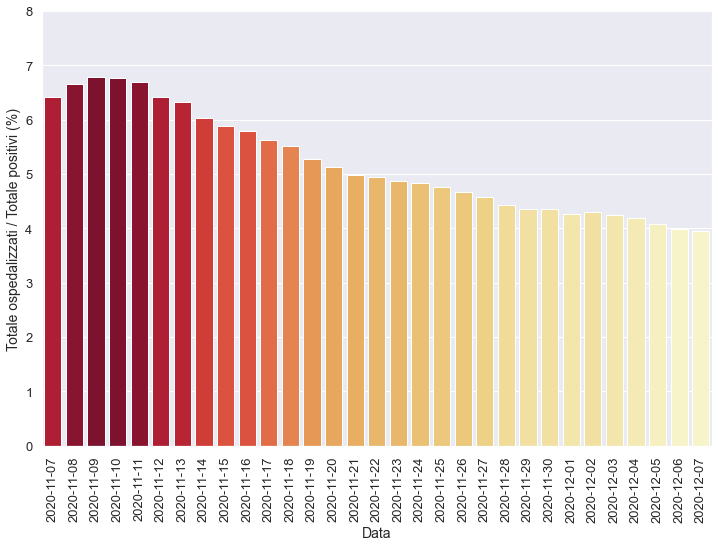

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

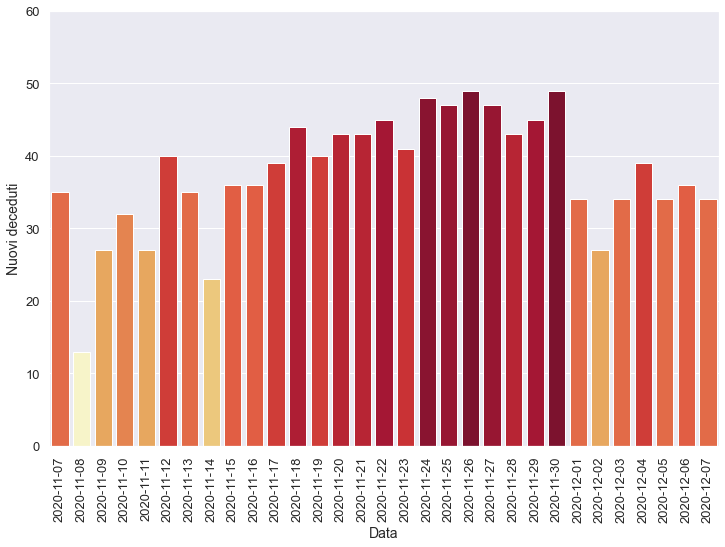

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

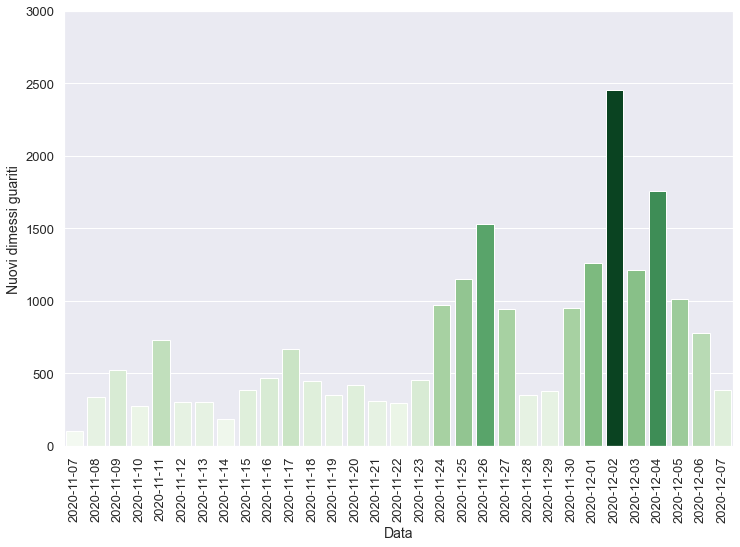

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-30T17:00:00,19,Sicilia,1547,226,1773,38851,40624,140,1138,...,49.0,8602.0,4965.0,130.0,12.75,4.36,13.23,22.92,-6.22,0.35
1,2020-12-01T17:00:00,19,Sicilia,1517,220,1737,38993,40730,106,1399,...,34.0,10773.0,6386.0,142.0,12.67,4.26,12.99,21.91,-2.65,0.26
2,2020-12-02T17:00:00,19,Sicilia,1494,220,1714,38017,39731,-999,1483,...,27.0,11536.0,7171.0,-976.0,12.84,4.31,12.86,20.68,0.00,-2.45
3,2020-12-03T17:00:00,19,Sicilia,1465,221,1686,38094,39780,49,1294,...,34.0,10581.0,6329.0,77.0,13.11,4.24,12.23,20.45,0.45,0.12
4,2020-12-04T17:00:00,19,Sicilia,1431,216,1647,37703,39350,-430,1365,...,39.0,10026.0,5870.0,-391.0,13.11,4.19,13.61,23.25,-2.26,-1.08
5,2020-12-05T17:00:00,19,Sicilia,1400,215,1615,37925,39540,190,1240,...,34.0,10875.0,6398.0,222.0,13.31,4.08,11.40,19.38,-0.46,0.48
6,2020-12-06T17:00:00,19,Sicilia,1367,213,1580,38166,39746,206,1022,...,36.0,8132.0,5023.0,241.0,13.48,3.98,12.57,20.35,-0.93,0.52
7,2020-12-07T17:00:00,19,Sicilia,1387,205,1592,38654,40246,500,918,...,34.0,8386.0,4828.0,488.0,12.88,3.96,10.95,19.01,-3.76,1.26


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

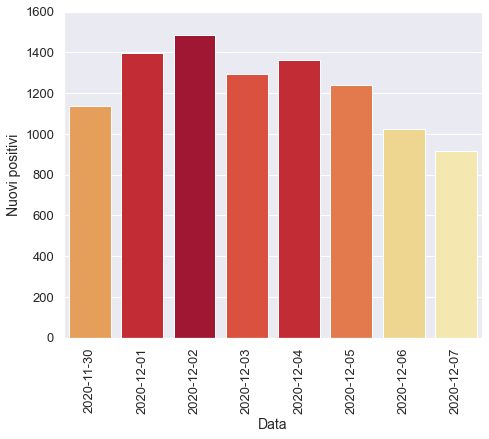

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

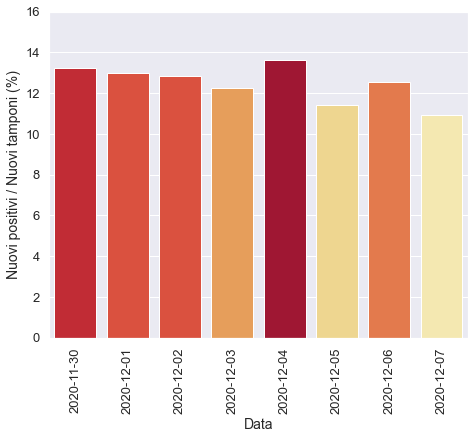

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

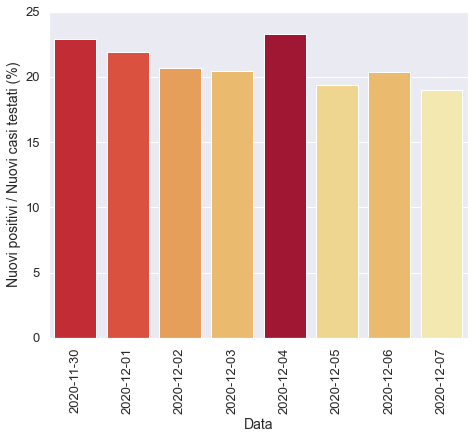

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

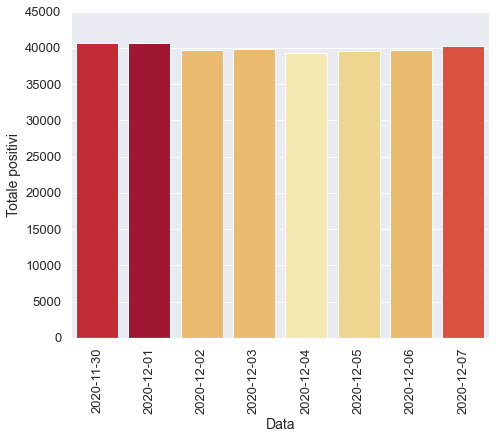

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

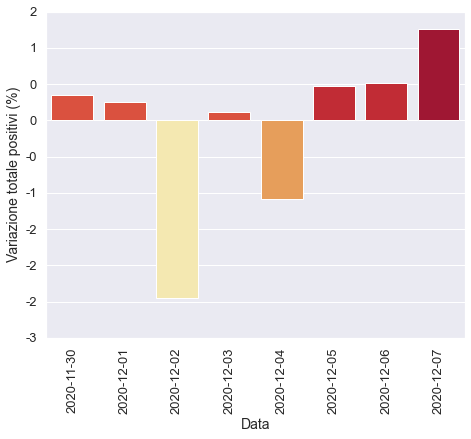

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

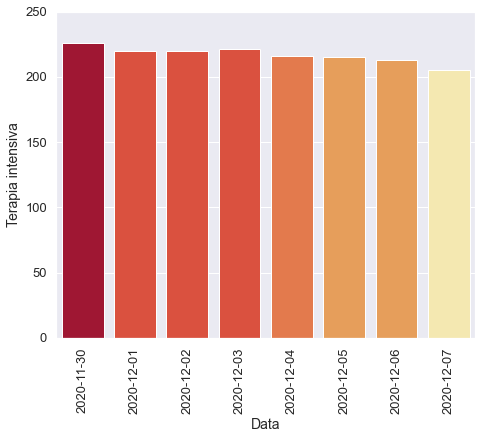

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

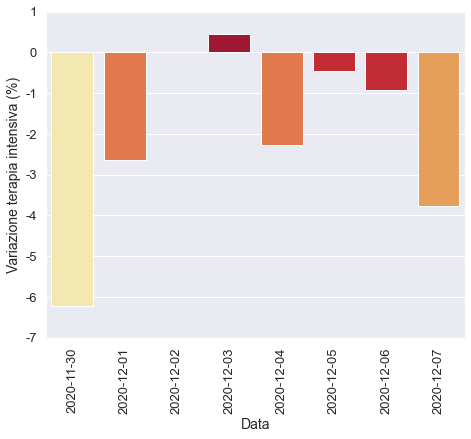

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

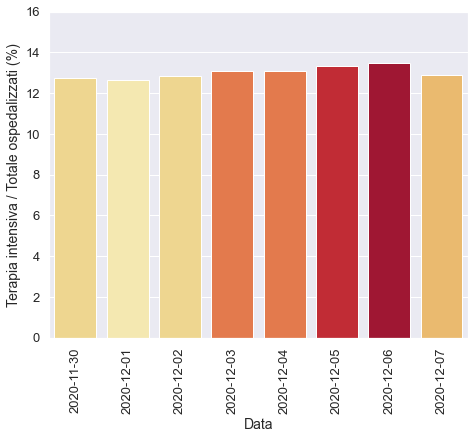

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

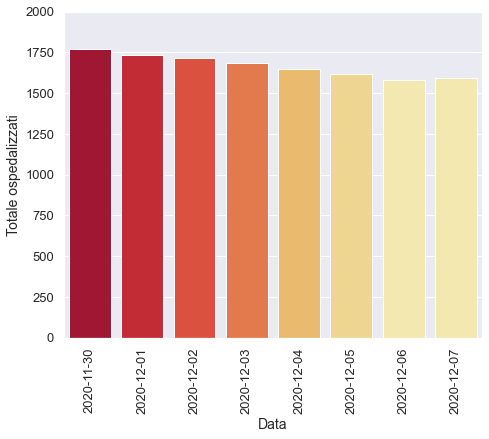

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

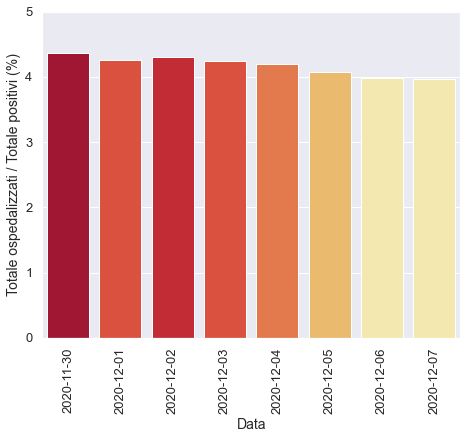

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

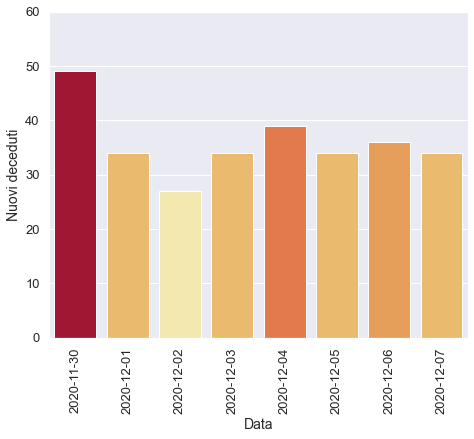

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

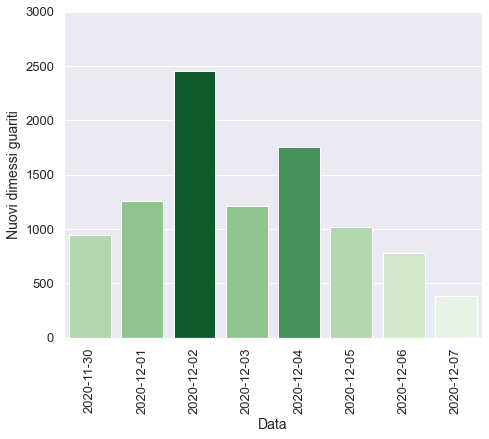

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)